In [1]:
from matplotlib import rcParams
import sympy

rcParams["text.usetex"] = True
sympy.init_printing(forecolor="White", use_latex="svg", scale=1)

## Construcing the *M* matrix using the stoichiometric matrix, flux vector, and pool size vector

Consider a metabolic network with a stoichiometric matrix $S$. All reactions are uni-uni (one substrate and on product)
which means each column contains one +1 and one -1, all the rest are zeros.
The flux vector $v$ contains the absolute rates in the same order of reactions as the columns of $S$.
The poolsize vector $s$ is the same order as the rows of $S$.

We initialize at $t=0$ where $S_0$ is fully labelled and all other states have 0 labeling.
Note that this only works if there are no incoming fluxes into $S_0$, otherwise its labeling will change over time.

'M = '

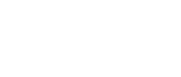

In [3]:
N = 3

# time variable
t = sympy.symbols("t")

# helper constants
ones = sympy.Matrix([[1]*N], shape=(N, 1)).T

# state pool sizes
s = sympy.symbols(" ".join([f"s_{i+1}" for i in range(N)]))
S_inv = sympy.Matrix.diag(s)**(-1)
s = sympy.Matrix([s], shape=(N, 1)).T

# flux variables
v = sympy.symbols(" ".join([f"v_{i}" for i in range(N+1)]))

# internal flux matrix
V = sympy.Matrix([
    [0, v[1], 0],
    [0, 0, v[2]],
    [0, 0, 0]
])

# external flux matrix
Y = sympy.Matrix([[v[0], 0, 0]], shape=(N, 1))

M = S_inv @ (V.T - sympy.Matrix.diag(*(ones.T @ V + Y)))
display("M = ", M)

'f(t) = '

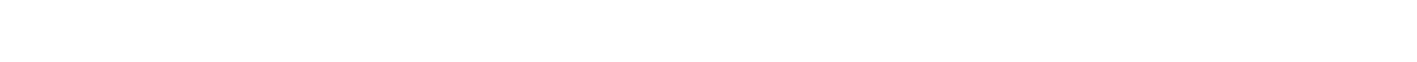

'<f> = '

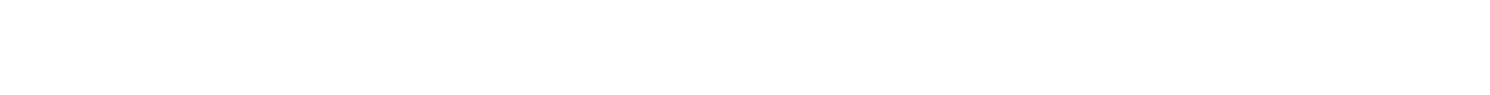

'ψ(t) = '

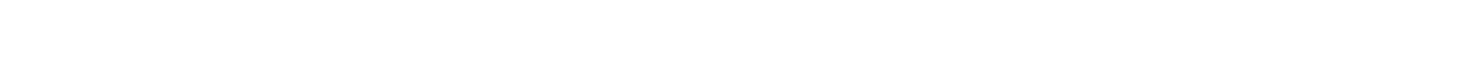

'<ψ> = '

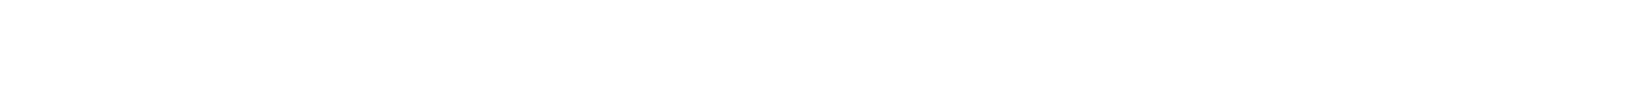

'γ = '

'φ = '

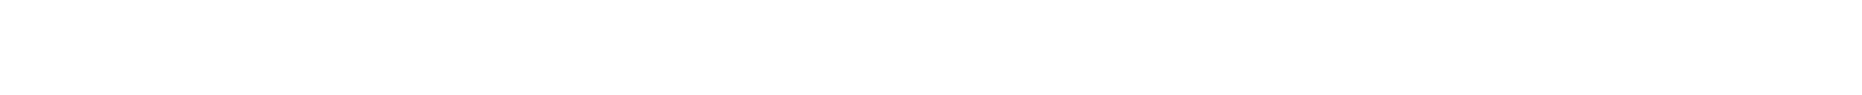

In [4]:
f = sympy.simplify((M * t).exp() @ ones)
meanf = sympy.simplify((s.T @ f)[0] / (s.T @ ones)[0])
psi = sympy.simplify(-M @ f)
meanpsi = sympy.simplify(-(s.T @ M @ f)[0] / (s.T @ ones)[0])
gamma = sympy.simplify(- M**(-1) @ ones)
phi = sympy.simplify(-(s.T @ M**2 @ f)[0] / (s.T @ M @ ones)[0])

display("f(t) = ", f.T)
display("<f> = ", meanf)
display("ψ(t) = ", psi.T)
display("<ψ> = ", meanpsi)
display("γ = ", gamma.T)
display("φ = ", phi)

'labeling (f)'

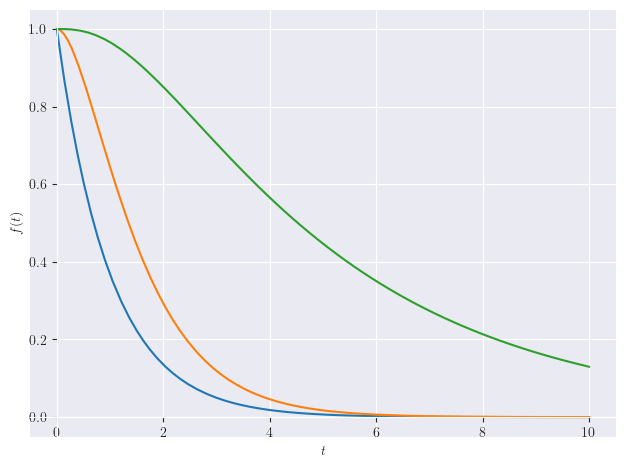

'age PDF (ψ)'

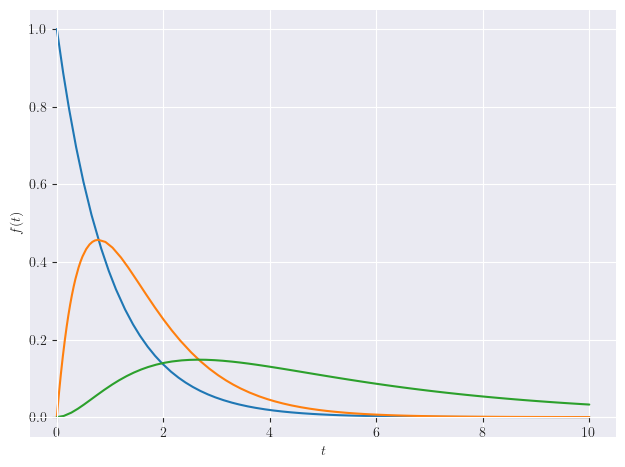

'overall labeling <f>'

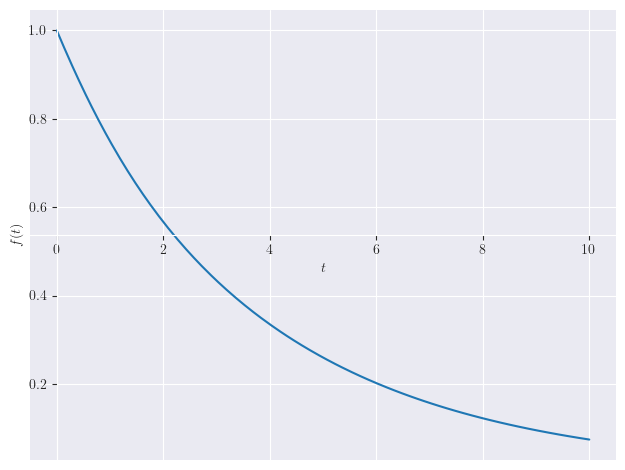

'overall age PDF <ψ>'

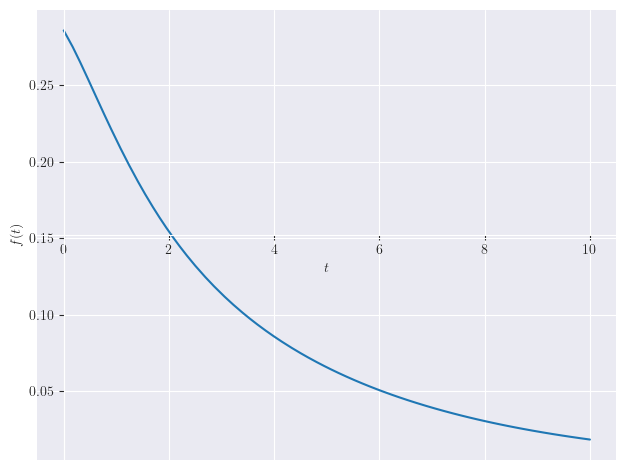

'transit time PDF (φ)'

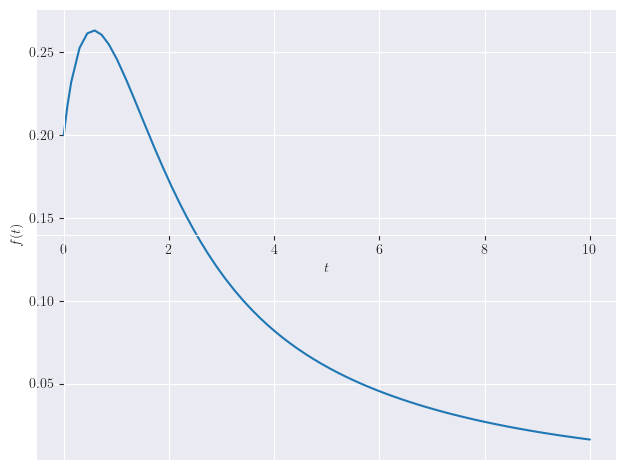

In [5]:
params = {v[0]: 1.0, v[1]: 0.8, v[2]: 0.5, v[3]: 0.3, s[0]: 1.0, s[1]: 0.5, s[2]: 2.0}
display("labeling (f)")
sympy.plotting.plot(*f.subs(params), (t, 0.0, 10))
display("age PDF (ψ)")
sympy.plotting.plot(*psi.subs(params), (t, 0.0, 10))
display("overall labeling <f>")
sympy.plotting.plot(meanf.subs(params), (t, 0.0, 10))
display("overall age PDF <ψ>")
sympy.plotting.plot(meanpsi.subs(params), (t, 0.0, 10))
display("transit time PDF (φ)")
sympy.plotting.plot(phi.subs(params), (t, 0.0, 10))


## We explore the difference between two scenarios:

A) A three-step maturation process where the 3rd state is the inaccessible pool (and we care about the second state)

'M = '

⎡-μ⋅(s₁ + s₂ + s₃)    μ⋅(s₂ + s₃)     ⎤
⎢──────────────────   ───────────   0 ⎥
⎢        s₁                s₂         ⎥
⎢                                     ⎥
⎢                    -μ⋅(s₂ + s₃)     ⎥
⎢        0           ─────────────  μ ⎥
⎢                          s₂         ⎥
⎢                                     ⎥
⎣        0                 0        -μ⎦

'M^(-1) = '

⎡       -s₁                 -s₁                 -s₁        ⎤
⎢──────────────────  ──────────────────  ──────────────────⎥
⎢s₁⋅μ + s₂⋅μ + s₃⋅μ  s₁⋅μ + s₂⋅μ + s₃⋅μ  s₁⋅μ + s₂⋅μ + s₃⋅μ⎥
⎢                                                          ⎥
⎢                           -s₂                 -s₂        ⎥
⎢        0              ───────────         ───────────    ⎥
⎢                       s₂⋅μ + s₃⋅μ         s₂⋅μ + s₃⋅μ    ⎥
⎢                                                          ⎥
⎢                                               -1         ⎥
⎢        0                   0                  ───        ⎥
⎣                                                μ         ⎦

'g = '

⎡μ⋅(s₁ + s₂ + s₃)      ⎤
⎢────────────────  0  0⎥
⎣       s₁             ⎦

'f(t) = '

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

'a(t) = '

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                       ⎛ t⋅μ⋅(s₁ + s₂ + s₃)  
⎢                                                       ⎜ ──────────────────  
⎢                                                       ⎜         s₁          
⎢                                           μ⋅(s₂ + s₃)⋅⎝ℯ                   -
⎢                                           ──────────────────────────────────
⎢                                                   

'γ = '

⎡                   s₁                    ⎤
⎢            ────────────────             ⎥
⎢            μ⋅(s₁ + s₂ + s₃)             ⎥
⎢                                         ⎥
⎢                          2              ⎥
⎢      2⋅s₁⋅s₂ + s₁⋅s₃ + s₂  + s₂⋅s₃      ⎥
⎢ ─────────────────────────────────────── ⎥
⎢   ⎛                  2               2⎞ ⎥
⎢ μ⋅⎝s₁⋅s₂ + s₁⋅s₃ + s₂  + 2⋅s₂⋅s₃ + s₃ ⎠ ⎥
⎢                                         ⎥
⎢                        2               2⎥
⎢3⋅s₁⋅s₂ + 2⋅s₁⋅s₃ + 2⋅s₂  + 3⋅s₂⋅s₃ + s₃ ⎥
⎢─────────────────────────────────────────⎥
⎢   ⎛                  2               2⎞ ⎥
⎣ μ⋅⎝s₁⋅s₂ + s₁⋅s₃ + s₂  + 2⋅s₂⋅s₃ + s₃ ⎠ ⎦

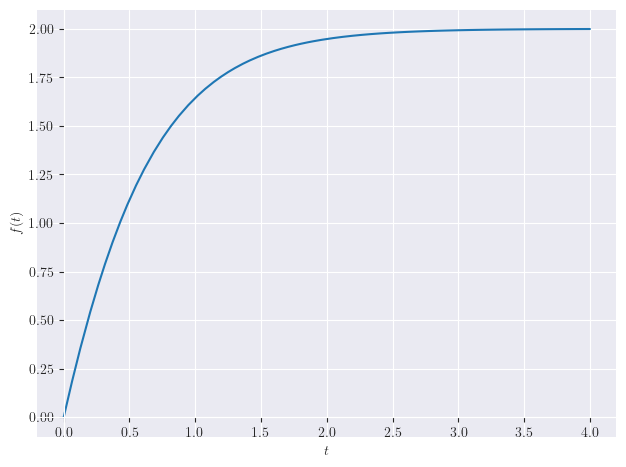

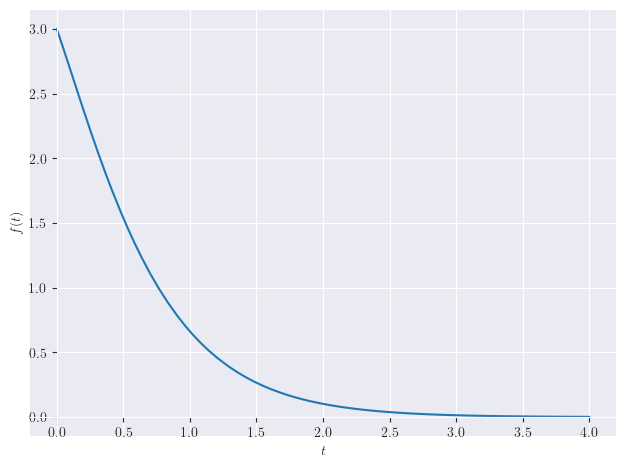

'average age = '

In [6]:
# here we use a simple model with 3 irreversible reactions S0 -> S1 -> S2 -> S3
N = 3

# time variable
t = sympy.symbols("t")
mu = sympy.symbols("μ")

# helper constants
ones = sympy.Matrix([[1]*N], shape=(1, N))

# state pool sizes
s = sympy.symbols(" ".join([f"s_{i+1}" for i in range(N)]))
S_inv = sympy.Matrix.diag(s)**(-1)

# internal flux matrix
V = sympy.Matrix([
    [0, mu*(s[1]+s[2]), 0],
    [0, 0, mu*(s[2])],
    [0, 0, 0]
])

# external flux matrix
Y = sympy.Matrix([[mu*(s[0]+s[1]+s[2]), 0, 0]], shape=(1, N))

f0 = sympy.Matrix([[0]*N], shape=(1, N))

M = (V - sympy.Matrix.diag(*(ones @ V + Y))) @ S_inv
M_inv = M.pow(-1)
g = Y @ S_inv

f = sympy.simplify((f0 + g @ M_inv) @ (M * t).exp() - g @ M_inv)
a = sympy.simplify(g @ (M * t).exp())
gamma = sympy.simplify(g @ M.pow(-2))

display("M = ", M)
display("M^(-1) = ", M_inv)
display("g = ", g)
display("f(t) = ", f.T)
display("a(t) = ", a.T)
display("γ = ", gamma.T)

params = {mu: 1.0, s[0]: 1.0, s[1]: 1.0, s[2]: 1.0}
f_example = f.subs(params)
a_example = a.subs(params)
display(a_example)
sympy.plotting.plot(f_example[0] + f_example[1], (t, 0.0, 4))
sympy.plotting.plot(a_example[0] + a_example[1], (t, 0.0, 4))
display("average age = ", gamma.subs(params))

B) A two-step maturation process where the first state has an inaccessible pool as well (i.e. the flux splits between the mature pool and an inaccessible pool)

'M = '

⎡-μ⋅(s₁ + s₂ + s₃)         ⎤
⎢──────────────────  μ   μ ⎥
⎢        s₁                ⎥
⎢                          ⎥
⎢        0           -μ  0 ⎥
⎢                          ⎥
⎣        0           0   -μ⎦

'M^(-1) = '

⎡       -s₁                 -s₁                 -s₁        ⎤
⎢──────────────────  ──────────────────  ──────────────────⎥
⎢s₁⋅μ + s₂⋅μ + s₃⋅μ  s₁⋅μ + s₂⋅μ + s₃⋅μ  s₁⋅μ + s₂⋅μ + s₃⋅μ⎥
⎢                                                          ⎥
⎢                           -1                             ⎥
⎢        0                  ───                  0         ⎥
⎢                            μ                             ⎥
⎢                                                          ⎥
⎢                                               -1         ⎥
⎢        0                   0                  ───        ⎥
⎣                                                μ         ⎦

'g = '

⎡μ⋅(s₁ + s₂ + s₃)      ⎤
⎢────────────────  0  0⎥
⎣       s₁             ⎦

'f(t) = '

⎡                ⎛ t⋅μ⋅(s₁ + s₂ + s₃)    ⎞  -t⋅μ⋅(s₁ + s₂ + s₃)               
⎢                ⎜ ──────────────────    ⎟  ────────────────────              
⎢                ⎜         s₁            ⎟           s₁                       
⎢                ⎝ℯ                   - 1⎠⋅ℯ                                  
⎢                                                                             
⎢           s₂⋅t⋅μ   s₃⋅t⋅μ                                                   
⎢    -t⋅μ - ────── - ──────                                                   
⎢             s₁       s₁         -t⋅μ                 -t⋅μ                 -t
⎢s₁⋅ℯ                         s₁⋅ℯ          s₂     s₂⋅ℯ          s₃     s₃⋅ℯ  
⎢────────────────────────── - ──────── + ─────── - ──────── + ─────── - ──────
⎢         s₂ + s₃             s₂ + s₃    s₂ + s₃   s₂ + s₃    s₂ + s₃   s₂ + s
⎢                                                                             
⎢           s₂⋅t⋅μ   s₃⋅t⋅μ                         

'a(t) = '

⎡                                  -t⋅μ⋅(s₁ + s₂ + s₃)                  ⎤
⎢                                  ────────────────────                 ⎥
⎢                                           s₁                          ⎥
⎢                μ⋅(s₁ + s₂ + s₃)⋅ℯ                                     ⎥
⎢                ──────────────────────────────────────                 ⎥
⎢                                  s₁                                   ⎥
⎢                                                                       ⎥
⎢   ⎛        t⋅μ⋅(s₁ + s₂ + s₃)⎞                 -t⋅μ⋅(2⋅s₁ + s₂ + s₃)  ⎥
⎢   ⎜        ──────────────────⎟                 ────────────────────── ⎥
⎢   ⎜ t⋅μ            s₁        ⎟                           s₁           ⎥
⎢-μ⋅⎝ℯ    - ℯ                  ⎠⋅(s₁ + s₂ + s₃)⋅ℯ                       ⎥
⎢───────────────────────────────────────────────────────────────────────⎥
⎢                                s₂ + s₃                                ⎥
⎢                                     

'γ = '

⎡       s₁       ⎤
⎢────────────────⎥
⎢μ⋅(s₁ + s₂ + s₃)⎥
⎢                ⎥
⎢ 2⋅s₁ + s₂ + s₃ ⎥
⎢────────────────⎥
⎢μ⋅(s₁ + s₂ + s₃)⎥
⎢                ⎥
⎢ 2⋅s₁ + s₂ + s₃ ⎥
⎢────────────────⎥
⎣μ⋅(s₁ + s₂ + s₃)⎦

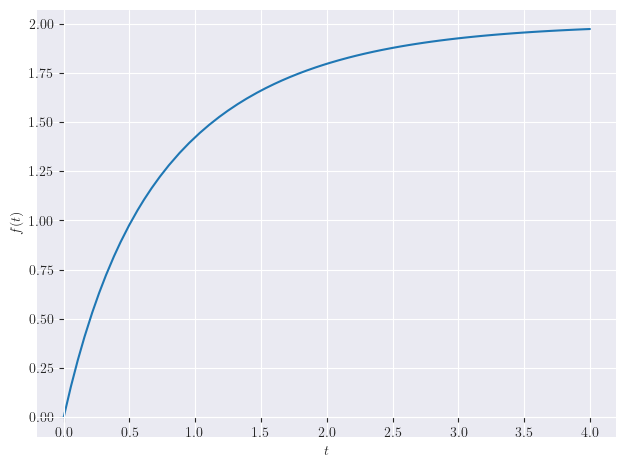

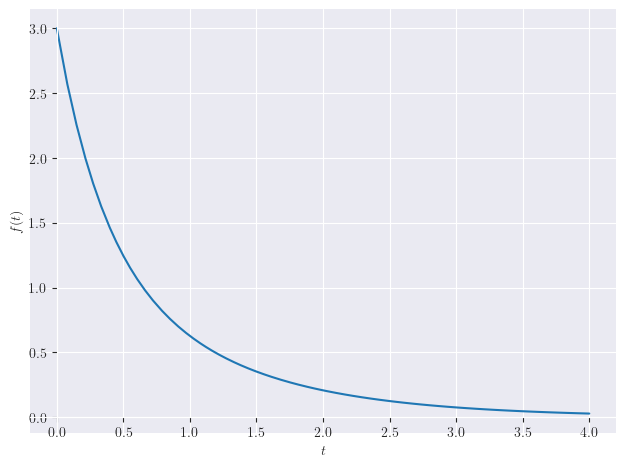

'average age = '

In [7]:
# here we use a simple model with 3 irreversible reactions S0 -> S1 -> S2 and S1 -> S3
N = 3

# time variable
t = sympy.symbols("t")
mu = sympy.symbols("μ")

# helper constants
ones = sympy.Matrix([[1]*N], shape=(1, N))

# state pool sizes
s = sympy.symbols(" ".join([f"s_{i+1}" for i in range(N)]))
S_inv = sympy.Matrix.diag(s)**(-1)

# flux variables
v = sympy.symbols(" ".join([f"v_{i}" for i in range(N+1)]))

# internal flux matrix
V = sympy.Matrix([
    [0, mu*s[1], mu*s[2]],
    [0, 0, 0],
    [0, 0, 0]
])

# external flux matrix
Y = sympy.Matrix([[mu*(s[0]+s[1]+s[2]), 0, 0]], shape=(1, N))

f0 = sympy.Matrix([[0]*N], shape=(1, N))

M = (V - sympy.Matrix.diag(*(ones @ V + Y))) @ S_inv
M_inv = M.pow(-1)
g = Y @ S_inv

f = sympy.simplify((f0 + g @ M_inv) @ (M * t).exp() - g @ M_inv)
a = sympy.simplify(g @ (M * t).exp())
gamma = sympy.simplify(g @ M.pow(-2))

display("M = ", M)
display("M^(-1) = ", M_inv)
display("g = ", g)
display("f(t) = ", f.T)
display("a(t) = ", a.T)
display("γ = ", gamma.T)

params = {mu: 1.0, s[0]: 1.0, s[1]: 1.0, s[2]: 1.0}
f_example = f.subs(params)
a_example = a.subs(params)
display(a_example)
sympy.plotting.plot(f_example[0] + f_example[1], (t, 0.0, 4))
sympy.plotting.plot(a_example[0] + a_example[1], (t, 0.0, 4))
display("average age = ", gamma.subs(params))

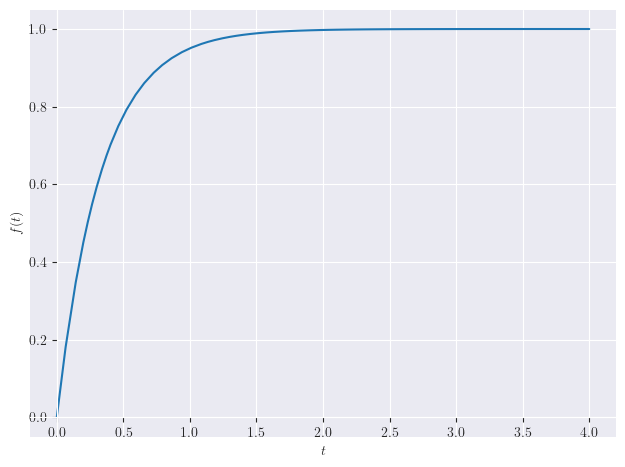

In [8]:
sympy.plotting.plot(f_example[0], (t, 0.0, 4))
